## Načtení dat

In [125]:
import pandas as pd
sms = pd.read_csv('SMSSpamCollection.txt', encoding='utf-8', sep = '\t',names=['label','message'])
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Průzkum dat

In [126]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [127]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


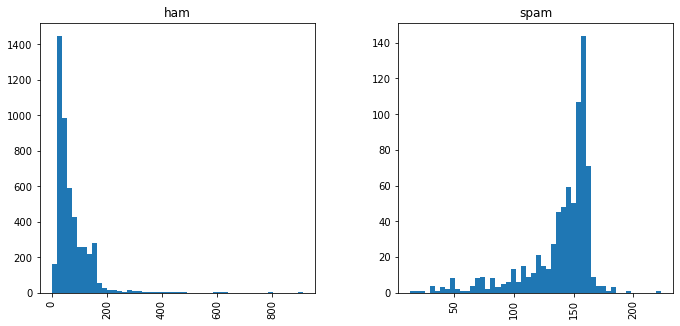

In [128]:
import matplotlib.pyplot as plt
sms.hist(column='length', by='label', bins=50,figsize=(11,5))
plt.show()

## Příprava dat

In [129]:
#import nltk
#nltk.download()

from nltk.corpus import stopwords
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [130]:
import re
def preprocess(text):
    tokens = [token.lower() for token in re.findall('\w+', text) if token not in stopwords.words('english')]
    return " ".join(tokens)

In [131]:
sms['message'][6]

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [132]:
preprocess(sms['message'][6])

'even brother like speak they treat like aids patent'

In [133]:
result=sms['message'].apply(preprocess)
result

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                nah i think goes usf lives around though
                              ...                        
5567    this 2nd time tried 2 contact u u 750 pound pr...
5568                     will ü b going esplanade fr home
5569                             pity mood so suggestions
5570    the guy bitching i acted like interested buyin...
5571                                   rofl its true name
Name: message, Length: 5572, dtype: object

## Výpočet četností

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(input="english")
X = vectorizer.fit_transform(result)
X

<5572x8692 sparse matrix of type '<class 'numpy.float64'>'
	with 51812 stored elements in Compressed Sparse Row format>

In [135]:
print(X)

  (0, 8304)	0.19367133232870914
  (0, 1080)	0.34662215358656684
  (0, 3607)	0.16249778391503625
  (0, 2057)	0.2928277960456836
  (0, 1761)	0.3308883126306653
  (0, 4489)	0.2928277960456836
  (0, 8527)	0.23446293536343882
  (0, 3647)	0.1914742686221826
  (0, 1763)	0.2928277960456836
  (0, 1313)	0.2592620666240387
  (0, 2333)	0.2684349975703689
  (0, 5942)	0.2711122263759042
  (0, 4362)	0.34662215358656684
  (0, 3563)	0.15700111684745632
  (1, 5553)	0.5466243141314314
  (1, 8429)	0.43162957585464123
  (1, 4330)	0.5236804332035243
  (1, 4525)	0.4083258549263009
  (1, 5524)	0.2718944069420321
  (2, 77)	0.23481398547774926
  (2, 1167)	0.16878205227806695
  (2, 6268)	0.16878205227806695
  (2, 7966)	0.12429583820628914
  (2, 7262)	0.1966389668741482
  (2, 6216)	0.1787234410397601
  :	:
  (5568, 3576)	0.3299850041793482
  (5568, 8439)	0.42335817127172604
  (5568, 3914)	0.33086288179759665
  (5569, 7404)	0.5800032287379318
  (5569, 5873)	0.5800032287379318
  (5569, 5147)	0.4823412435178001
  (5

## Trénování modelu

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, sms['label'], test_size=0.3, random_state=24)

In [137]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train, Y_train)

MultinomialNB(alpha=0.1)

In [138]:
mnb_predictions = mnb.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score
mnbs = accuracy_score(Y_test, mnb_predictions)
mnbs

0.9826555023923444

## Wrong predictions

In [142]:
mnb_predictions = mnb.predict(X)
for message, prediction, label in zip(sms['message'], mnb_predictions, sms['label']):
  if prediction != label:
    print(message, '\n') 

Did you hear about the new "Divorce Barbie"? It comes with all of Ken's stuff! 

Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES 

SMS. ac sun0819 posts HELLO:"You seem cool, wanted to say hi. HI!!!" Stop? Send STOP to 62468 

Filthy stories and GIRLS waiting for your 

Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Calls£1/minmoremobsEMSPOBox45PO139WA 

CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Calls£1/minmoremobsEMSPOBox45PO139WA 

Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin over? Pls leave msg 2day 09099726395 Lucy x Calls£1/minMobsmoreLKPOBOX177HP51FL 

Thanks for the Vote. Now sing along with the stars with Karaoke on your mobile. For a FREE link just reply with SING now. 

Yes we are chatting too. 

Would you like to se

## Porovnání s jinými modely

Rozhodovací strom

In [143]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(min_samples_split=10, random_state=24)
dtc.fit(X_train, Y_train)
dtc_predictions = dtc.predict(X_test)
dtcs = accuracy_score(Y_test, dtc_predictions)
dtcs

0.9712918660287081

Metoda nejbližšího souseda

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=49)
knc.fit(X_train, Y_train)
knc_predictions = knc.predict(X_test)
kncs = accuracy_score(Y_test, knc_predictions)
kncs

0.9336124401913876

In [145]:
items = {'Bayes': [mnbs], 'Tree': [dtcs], 'KNN': [kncs]}
df = pd.DataFrame.from_dict(items, orient='index', columns=['Score'])
print(df)

          Score
Bayes  0.982656
Tree   0.971292
KNN    0.933612


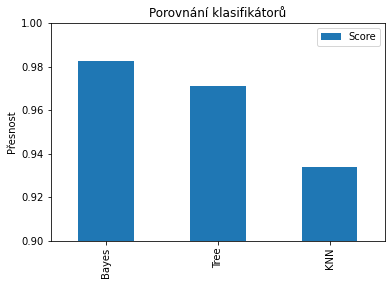

In [146]:
import numpy as np

df.plot(kind='bar', ylim=(0.9,1.0), align='center')
plt.xticks(np.arange(3),df.index)
plt.ylabel('Přesnost')
plt.title('Porovnání klasifikátorů')
plt.show()